# 03 - GSI and FSI
Ground Space Index and Floorspace Index, also known as Site Coverage and Floor Area Ratio

In [1]:
import sys
sys.path.append('..')

from osmuf.core import *

In [2]:
# dictionary of places of interest for convenience, 
places = {'posadas' : (-27.37577,-55.90059),
          'kaduna' : (10.53364, 7.37360),
          'buenos_aires' : (-34.5798,-58.4422), #57897,44013
          'margery_street' : (51.5266,-0.1109),
          'welwyn_garden_city': (51.7938,-0.18645)}

In [3]:
place='margery_street'
point=places[place]
distance=500 # in meters

In [4]:
city_blocks, city_blocks_gross, city_blocks_gross_raw = city_blocks_from_point(point, distance)

In [5]:
buildings = buildings_from_city_blocks(city_blocks)

In [6]:
city_blocks = blocks_with_buildings(city_blocks, buildings)

## City blocks coloured by GSI

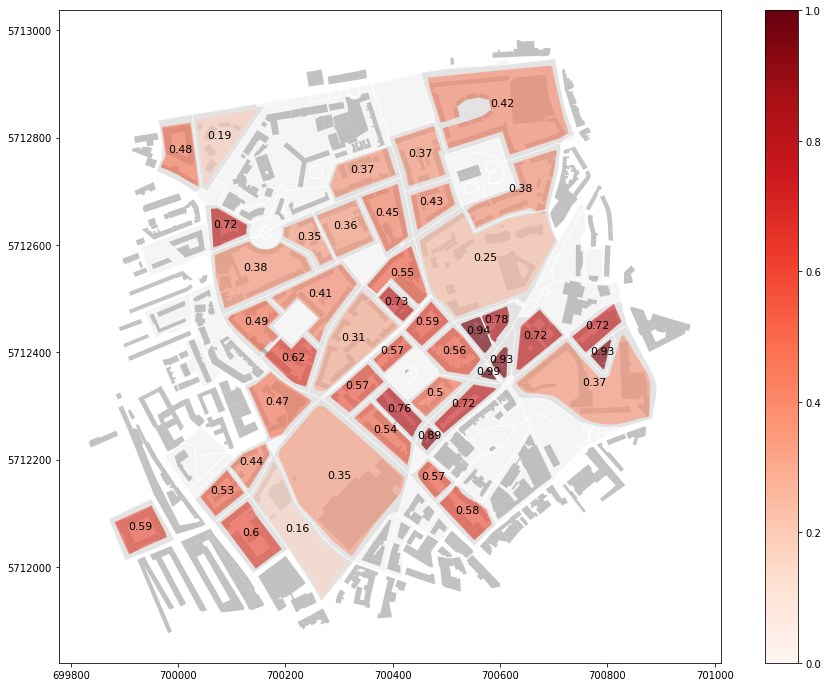

In [7]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,12));

city_blocks_gross.plot(ax=ax, color='lightgray',edgecolor='white', alpha=0.5);

buildings.plot(ax=ax, color='darkgray', alpha=0.7);

# show the city_blocks coloured by Ground Space Index/Site Coverage
city_blocks.plot(ax=ax, column='GSI_net', cmap='Reds',
                     vmin=0, vmax=1, alpha=0.6, legend=True)

# label style
style = dict(size=11, color='black', horizontalalignment='center')

# show Ground Space Index/Site Coverage per block
for idx, row in city_blocks.iterrows():
    label = str(round((row.GSI_net),2))
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, label, **style)

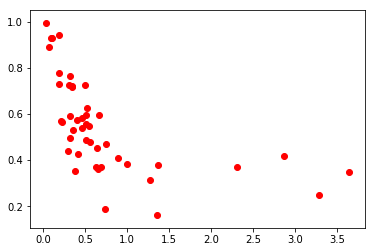

In [9]:
plt.scatter(city_blocks.area_net_ha, city_blocks.GSI_net, color='Red')

## City blocks coloured by FSI

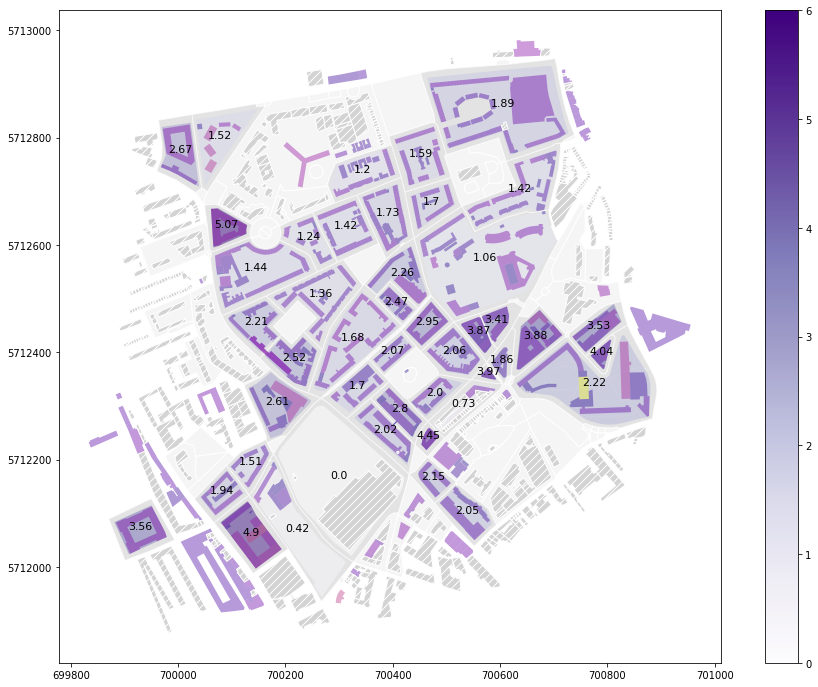

In [8]:
ax = city_blocks_gross_raw.plot(color='whitesmoke', edgecolor='white', figsize=(16,12));

city_blocks_gross.plot(ax=ax, color='lightgray',edgecolor='white', alpha=0.5);

# show the city_blocks coloured by Ground Space Index/Site Coverage
city_blocks.plot(ax=ax, column='FSI_net', cmap='Purples',
                     vmin=0, vmax=6, alpha=0.6, legend=True)

# show the buildings coloured by storeys above ground
# show the buildings with known storeys
buildings[buildings['building:levels']>0].plot(ax=ax,
                            column='building:levels',
                            cmap='plasma',
                            vmin=0,
                            vmax=25,
                            alpha=0.4)

# show the buildings with unknown storeys
buildings[buildings['building:levels']==0].plot(ax=ax,
                              color='lightgrey',
                              edgecolor='white',
                              hatch='///')

# label style
style = dict(size=11, color='black', horizontalalignment='center')

# show Ground Space Index/Site Coverage per block
for idx, row in city_blocks.iterrows():
    label = str(round((row.FSI_net),2))
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, label, **style)

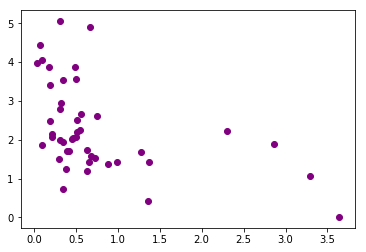

In [10]:
plt.scatter(city_blocks.area_net_ha, city_blocks.FSI_net, color='Purple')